# Les exoplanètes : peut-on trouver des planètes habitables et exploitables ?

Cellule d'import :

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## On commence par trier le tableau de base afin de ne garder du site que les infos qui nous intéressent

On ne traitera pas les données atmosphériques complexes d'habitabilité (on suppose possible un apport en oxygène constant grâce aux technologies) ni la présence d'eau, non mentionnées sur le site des données.

PS : on a eu affaire à un gros soucis pour avoir un tableau cohérent (>1h...) à cause du téléchargement du fichier de base qui n'était même pas directement exploitable sur excel

PPS : pl_eqt est la température de la planète en moyenne


In [14]:
df = pd.read_csv('données.csv', delimiter = ';')
df.head()

,pl_name,Nombre_etoile,Nombre_planete,Méthode,Orbite,Rayon,Masse terrienne,Eccentricité,Insolation,pl_eqt,Inclinaison,Température_etoile,Masse_etoile,Luminosité,Distance
0,11 Com b,2,1,Radial Velocity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,NaN,93.1846
1,11 Com b,2,1,Radial Velocity,326.03000,NaN,NaN,0.231,NaN,NaN,NaN,4742.0,2.70,2.243,93.1846
2,11 Com b,2,1,Radial Velocity,323.21000,NaN,NaN,0.238,NaN,NaN,NaN,4874.0,2.09,1.978,93.1846
3,11 UMi b,1,1,Radial Velocity,516.21997,NaN,NaN,0.080,NaN,NaN,NaN,4213.0,2.78,NaN,125.3210
4,11 UMi b,1,1,Radial Velocity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70,NaN,125.3210


## On va maintenant exploiter des données relativement à la Terre en taille/masse

* L'enjeu ici est d'exploiter des comparaisons vis-à-vis de la Terre pour en tirer des conclusions d'exploitation minière/de ressources

On commence par regarder sa masse et son rayon, qui permettrait d'en déduire sa densité également(et donc imaginer la composition de ses sols). 

On supprime les données NaN des rayons (en rayons terrestres) et masses (en masses terrestres) : 

In [15]:
df1 = df.dropna(subset = ['Rayon', 'Masse terrienne'])
df1.head()

,pl_name,Nombre_etoile,Nombre_planete,Méthode,Orbite,Rayon,Masse terrienne,Eccentricité,Insolation,pl_eqt,Inclinaison,Température_etoile,Masse_etoile,Luminosité,Distance
30,1RXS J160929.1-210524 b,1,1,Imaging,NaN,18.647,2543.000,NaN,NaN,1800.0,NaN,4060.0,0.85,NaN,139.1350
39,2MASS J02192210-3925225 b,1,1,Imaging,NaN,16.141,4417.837,NaN,NaN,NaN,NaN,3064.0,0.11,-2.230,NaN
105,55 Cnc e,2,5,Radial Velocity,0.736547,1.875,7.990,0.050,NaN,NaN,83.59,5172.0,0.91,NaN,12.5855
109,55 Cnc e,2,5,Radial Velocity,0.736539,1.910,8.080,NaN,NaN,NaN,83.30,5250.0,0.90,-0.197,12.5855
112,55 Cnc e,2,5,Radial Velocity,0.736544,2.080,7.810,0.061,NaN,1958.0,87.30,5234.0,0.91,NaN,12.5855


Voyons à quoi ressemble la relation masse-rayon :

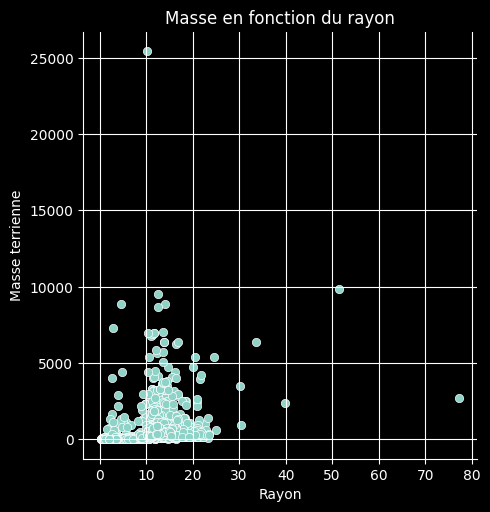

In [16]:
sns.relplot(data=df1, x='Rayon', y='Masse terrienne')
plt.title('Masse en fonction du rayon')
plt.style.use('dark_background')
plt.grid();

On remarque que le graphe n'est pas très visible, on va se limiter à un rayon de 50 rayons terrestres et une massse

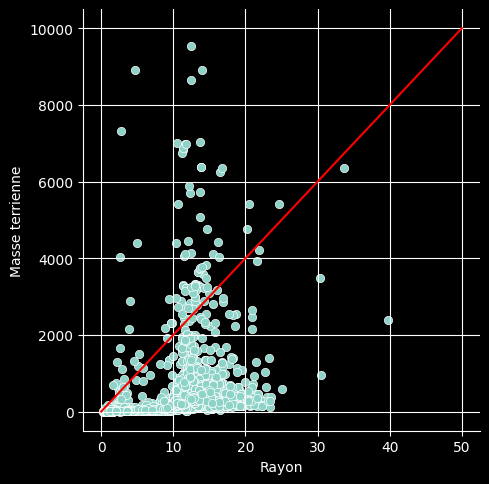

In [5]:
df1 = df1[(df1['Rayon'] < 50) & (df1['Masse terrienne'] < 10000)]
sns.relplot(data=df1, x='Rayon', y='Masse terrienne')
X = np.linspace(0, 50, 1000)
Y = np.linspace(0, 10000, 1000)
plt.plot(X,Y, '-r')
plt.grid();

On peut voir ici que les valeurs ne suivent pas une croissance linéaire, on en conclut donc qu'on a bien des compositions différentes. Les planètes ont même tendance à avoir une masse assez proche de la Terre (qui vaut 1 par définition) pour un rayon élevé plus élevé : donc moins denses.

On s'intéresse maintenant aux masses volumiques, sur une vision assez globale :

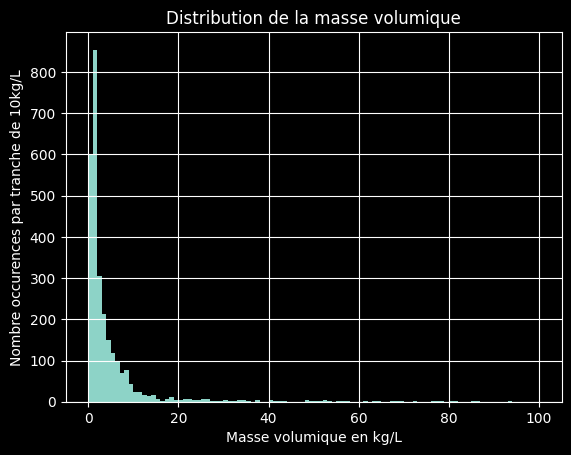

In [6]:
rayon = np.array(df1['Rayon'])*6371e3 #en mètres
masse = np.array(df1['Masse terrienne'])*6e24 #en kg
masse_vol = np.round(masse/(4/3*np.pi*rayon**3)/1000, 0) #en kg/L
plt.hist(masse_vol, range = (0, 100), bins = 100)
plt.title('Distribution de la masse volumique')
plt.xlabel('Masse volumique en kg/L')
plt.ylabel('Nombre occurences par tranche de 10kg/L')
plt.grid();

On rappelle ici que pour l'eau on a 1kg/L, pour le fer 8kg/L et en moyenne sur le Terre 5,5kg/L. On remarque donc que certaines planètes ont des masses volumiques assez élevées, ce qui peut signifier soit la présence d'anomalies dans les données de base, soit des planètes hors du commun (densités très particulières). 

On va se restreindre à des masse volumiques maximales de 25kg/L (l'élément le plus dense étant l'osmium à 23kg/L) :

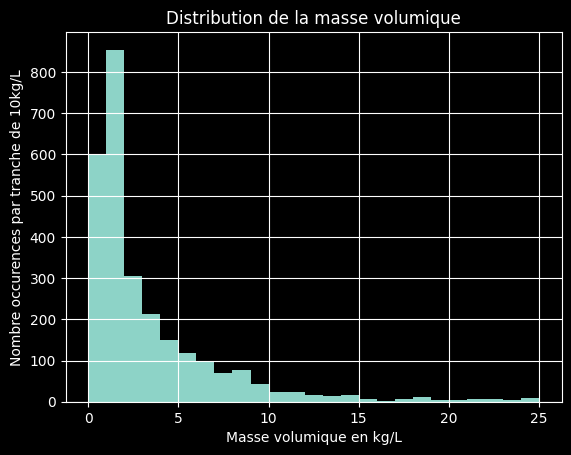

In [7]:
rayon = np.array(df1['Rayon'])*6371e3 #en mètres
masse = np.array(df1['Masse terrienne'])*6e24 #en kg
masse_vol = np.round(masse/(4/3*np.pi*rayon**3)/1000, 0) #en kg/L

plt.hist(masse_vol, range = (0, 25), bins = 25)

plt.title('Distribution de la masse volumique')
plt.xlabel('Masse volumique en kg/L')
plt.ylabel('Nombre occurences par tranche de 10kg/L')
plt.grid();

On remarque que la plupart des planètes ont une masse volumique plus faible que la Terre (synonyme soit d'une grande présence d'eau, ou alors un manque de présence d'éléments lourds). 

En effet si on calcule un peu la proportion :

In [8]:
print(np.round(len(masse_vol[masse_vol<5.5])/len(masse_vol)*100, 1), '%')

80.1 %


Nous avons donc 80% des planètes de données exploitables qui sont moins denses que la Terre. 

## Conclusion

On note que la plupart des planètes étudiées sont similaires aux proportions/masses de la Terre. De plus, si on envisage une exploration/colonisation spatiale, on aurait tendance à s'orienter vers des planètes dneses pour avoir accès à des métaux lourds/rares (20% des données exploitables), ce qui à l'inverse tend à être synonyme d'absence de vie/d'eau.

## On va maintenant exploiter des données d'orbites

* L'enjeu est ici de voir à quoi peuvent ressembler les périodes orbitales des exoplanètes pour en tirer des conclusions d'habitabilité

Tout d'abord on extrait une table de données sans NaN vis-à-vis des orbites (qui seront asssimilées aux périodes de révolution) :

In [9]:
df2 = df.dropna(subset = ['Orbite'])
df2.head()

,pl_name,Nombre_etoile,Nombre_planete,Méthode,Orbite,Rayon,Masse terrienne,Eccentricité,Insolation,pl_eqt,Inclinaison,Température_etoile,Masse_etoile,Luminosité,Distance
1,11 Com b,2,1,Radial Velocity,326.03000,NaN,NaN,0.231,NaN,NaN,NaN,4742.0,2.70,2.243,93.1846
2,11 Com b,2,1,Radial Velocity,323.21000,NaN,NaN,0.238,NaN,NaN,NaN,4874.0,2.09,1.978,93.1846
3,11 UMi b,1,1,Radial Velocity,516.21997,NaN,NaN,0.080,NaN,NaN,NaN,4213.0,2.78,NaN,125.3210
5,11 UMi b,1,1,Radial Velocity,516.22000,NaN,NaN,0.080,NaN,NaN,NaN,4340.0,1.80,NaN,125.3210
6,14 And b,1,1,Radial Velocity,186.76000,NaN,NaN,0.000,NaN,NaN,NaN,4888.0,1.78,1.840,75.4392


Voyons d'abord la distribution des orbites (unités en jours) :

In [10]:
orbite = np.array(df2['Orbite'])
print('Orbite max :', max(orbite), 'jours')
print('Orbite min :', np.round(min(orbite), 3), 'jours')
print('Orbite moyenne :', np.round(np.mean(orbite), 0), 'jours')

Orbite max : 402000000.0 jours
Orbite min : 0.091 jours
Orbite moyenne : 13109.0 jours


Un enjeu apparait clairement ici : avoir une période de révolution trop élevée poserait problème avec une colonialisation car les êtres humains ne seraient pas capables de stocker facilement de la nourriture pendant des périodes prolongées d'hiver. 

En effet les végétaux ne pourraient pas rentrer en hibernation prolongée. On va arbitrairement estimer qu'au maximum une période hivernale (un quart de période orbitale) ne doit pas dépasser 6 mois (déjà le cas pour les pôles Nord et Sud de la terre où pas de vie pousse...)

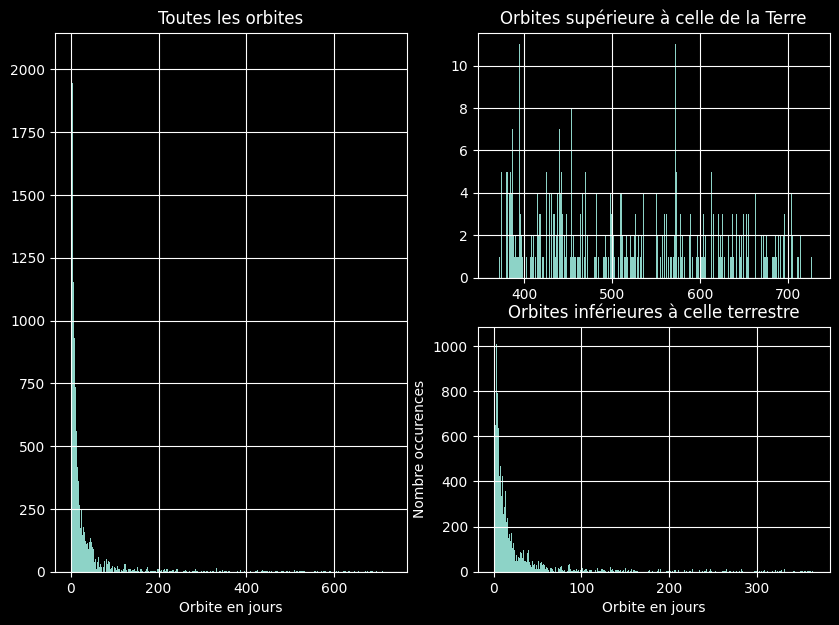

In [11]:
orbite2 = orbite[orbite < 365*2]
plt.figure(figsize = (10, 7))

plt.subplot(1, 2, 1)
plt.hist(orbite2, range = (0, 365*2), bins = 1000)
plt.title('Toutes les orbites')
plt.xlabel('Orbite en jours')
plt.grid()

plt.subplot(2, 2, 2)
plt.hist(orbite2, range = (365, 365*2), bins = 365)
plt.title('Orbites supérieure à celle de la Terre')
plt.grid()

plt.subplot(2, 2, 4)
plt.hist(orbite2, range = (0, 365), bins = 1000)
plt.title('Orbites inférieures à celle terrestre')
plt.xlabel('Orbite en jours')
plt.grid()
plt.ylabel('Nombre occurences');

On peut voir que la plupart des orbites sont inférieures à celle de la Terre, si on fait des statistiques on obtient : 

In [12]:
habitable = orbite[orbite<365*2]
inf = orbite[orbite<365] 
p1 = np.round(len(habitable)/len(orbite)*100, 1)
p2 = np.round(len(inf)/len(orbite), 1)

print('Pourcentage des exoplanètes avec orbite "vivable":', p1, '%')
print('Pourcentage des exoplanètes avec orbite plus rapide que la Terre:', p2, '%')

Pourcentage des exoplanètes avec orbite "vivable": 97.0 %
Pourcentage des exoplanètes avec orbite plus rapide que la Terre: 1.0 %


## Conclusion

D'après les études précédentes, on remarque que les conditions orbitales ne semblent pas être problématique puisque la plupart des exosplanètes semblent répondre au critère des saisons, permettant possiblement à la vie de se développer (à condition d'avoir de l'oxygène et de l'eau bien sûr... mais non étudié ici)